importing Jupyter notebook from preprocessing.ipynb
importing Jupyter notebook from FeatureSelection.ipynb
CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1
0        Says the Annies List political group suppo

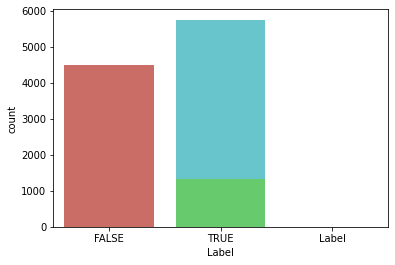

In [1]:
import import_ipynb
import preprocessing
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [2]:
nb_pipeline = Pipeline([
        ('NBCV',FeatureSelection.countv),
        ('nb_clf',MultinomialNB())])

In [3]:
nb_pipeline.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])
predicted_nb = nb_pipeline.predict(preprocessing.test_news['Statement'])
np.mean(predicted_nb == preprocessing.test_news['Label'])

0.6072128577028616

In [4]:
logR_pipeline = Pipeline([
        ('LogRCV',FeatureSelection.countv),
        ('LogR_clf',LogisticRegression())
        ])

In [5]:
logR_pipeline.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])
predicted_LogR = logR_pipeline.predict(preprocessing.test_news['Statement'])
np.mean(predicted_LogR == preprocessing.test_news['Label'])

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6013328106624853

In [6]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(preprocessing.train_news):
        train_text = preprocessing.train_news.iloc[train_ind]['Statement'] 
        train_y = preprocessing.train_news.iloc[train_ind]['Label']
    
        test_text = preprocessing.train_news.iloc[test_ind]['Statement']
        test_y = preprocessing.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(preprocessing.train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [7]:
build_confusion_matrix(nb_pipeline)

Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]


(None, None, None, None, None)

In [8]:
build_confusion_matrix(logR_pipeline)

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Total statements classified: 10240
Score: 0.6466692934443682
score length 5
Confusion matrix:
[[2254 2234]
 [1936 3816]]


/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(None, None, None, None, None)

In [9]:
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',FeatureSelection.tfidf_ngram),
        ('nb_clf',MultinomialNB())])

In [10]:
nb_pipeline_ngram.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(preprocessing.test_news['Statement'])
np.mean(predicted_nb_ngram == preprocessing.test_news['Label'])

0.5938847510780086

In [11]:
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',FeatureSelection.tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

In [12]:
logR_pipeline_ngram.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(preprocessing.test_news['Statement'])
np.mean(predicted_LogR_ngram == preprocessing.test_news['Label'])

0.6193649549196394

In [13]:
build_confusion_matrix(nb_pipeline_ngram)

Total statements classified: 10240
Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]


(None, None, None, None, None)

In [14]:
build_confusion_matrix(logR_pipeline_ngram)

Total statements classified: 10240
Score: 0.7044355553757985
score length 5
Confusion matrix:
[[1580 2908]
 [1043 4709]]


(None, None, None, None, None)

In [15]:
print(classification_report(preprocessing.test_news['Label'],predicted_nb_ngram))

              precision    recall  f1-score   support

       False       0.72      0.19      0.30      1169
        True       0.58      0.94      0.71      1382

    accuracy                           0.59      2551
   macro avg       0.65      0.56      0.51      2551
weighted avg       0.64      0.59      0.52      2551



In [16]:
print(classification_report(preprocessing.test_news['Label'],predicted_LogR_ngram))

              precision    recall  f1-score   support

       False       0.64      0.39      0.49      1169
        True       0.61      0.81      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



In [17]:
preprocessing.test_news['Label'].shape

(2551,)

In [18]:
from sklearn.model_selection import KFold

In [19]:
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(preprocessing.test_news['Label'], classifier)
    average_precision = average_precision_score(preprocessing.test_news['Label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

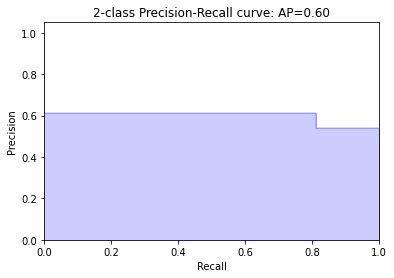

In [20]:
plot_PR_curve(predicted_LogR_ngram)

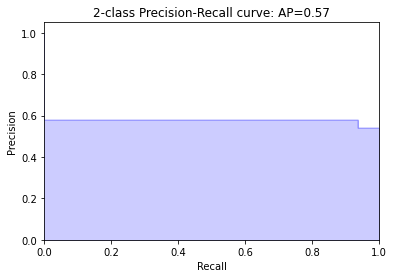

In [21]:
plot_PR_curve(predicted_nb_ngram)

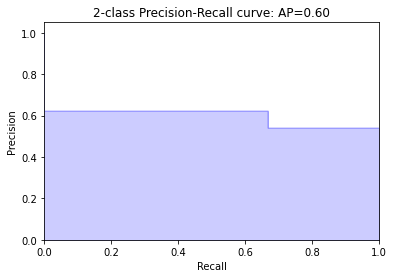

In [22]:
plot_PR_curve(predicted_LogR)

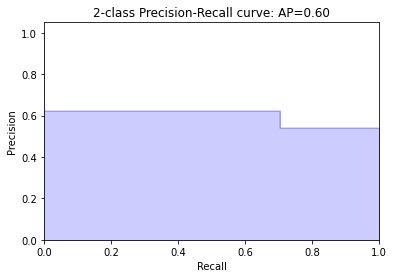

In [23]:
plot_PR_curve(predicted_nb)

In [24]:
import scikitplot.plotters as skplt

In [25]:
def plot_confusionMatrix(classifier):
    # plotting confusion matrix
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(preprocessing.train_news):
        train_text = preprocessing.train_news.iloc[train_ind]['Statement'] 
        train_y = preprocessing.train_news.iloc[train_ind]['Label']
    
        test_text = preprocessing.train_news.iloc[test_ind]['Statement']
        test_y = preprocessing.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
    skplt.plot_confusion_matrix(test_y, predictions)
    plt.show()

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


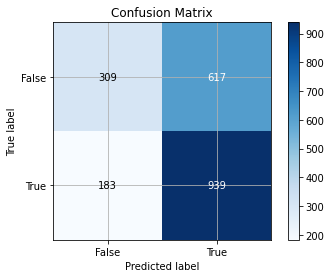

In [26]:
plot_confusionMatrix(logR_pipeline_ngram)

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


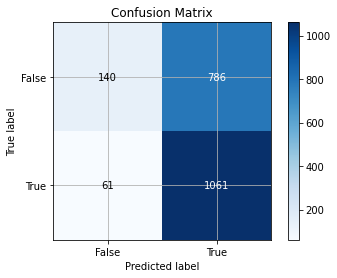

In [27]:
plot_confusionMatrix(nb_pipeline_ngram)